In [1]:
import numpy as np
import dill
import importlib
import sys
import os
import matplotlib.pyplot as plt
'''
v4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3

As of 1/13/23, the only change is the addition of the decision to action delay
'''

'\nv4 Uses the object imported from the py file class which is very similar to the Optimal_Stopping_Function_v3\n\nAs of 1/13/23, the only change is the addition of the decision to action delay\n'

In [2]:
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\Optimal Stopping') 
import Optimal_Stopping_Object_v3_unknown_switch_delay_unknown_gamble_uncertainty
from Subject_Object import *
from plot_functions import *
importlib.reload(Optimal_Stopping_Object_v3_unknown_switch_delay_unknown_gamble_uncertainty) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file
from Optimal_Stopping_Object_v3_unknown_switch_delay_unknown_gamble_uncertainty import *

import Group_Subject_Models_Object

# Initial Thangs

In [3]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1_Figures\\Optimal_Model_Figures\\Individual\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)

Create subject folders if they aren't there

In [4]:
for sub in figures_pull_list:
    p = os.path.join(SAVE_PATH,sub)
    if not os.path.exists(p):
        os.mkdir(p)

# Pickle Data

In [5]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject_object_dict = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

# Pickle Individual Optimal Models 

In [6]:
if 'optimal_model_dict' not in locals():
    load_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\Optimal_Model_Objects\\'
    optimal_model_dict = dill.load((open(load_path + 'subject_optimal_model_unknown_switch_delay_{SWITCH_DELAY}_unknown_gamble_uncertainty_dict.pkl', 'rb')))

# Put Individual Models into One Object for easy plotting

In [7]:
grouped = Group_Subject_Models_Object.Group_Subjects([x for x in optimal_model_dict.values()])

# Plots

In [8]:
save = False

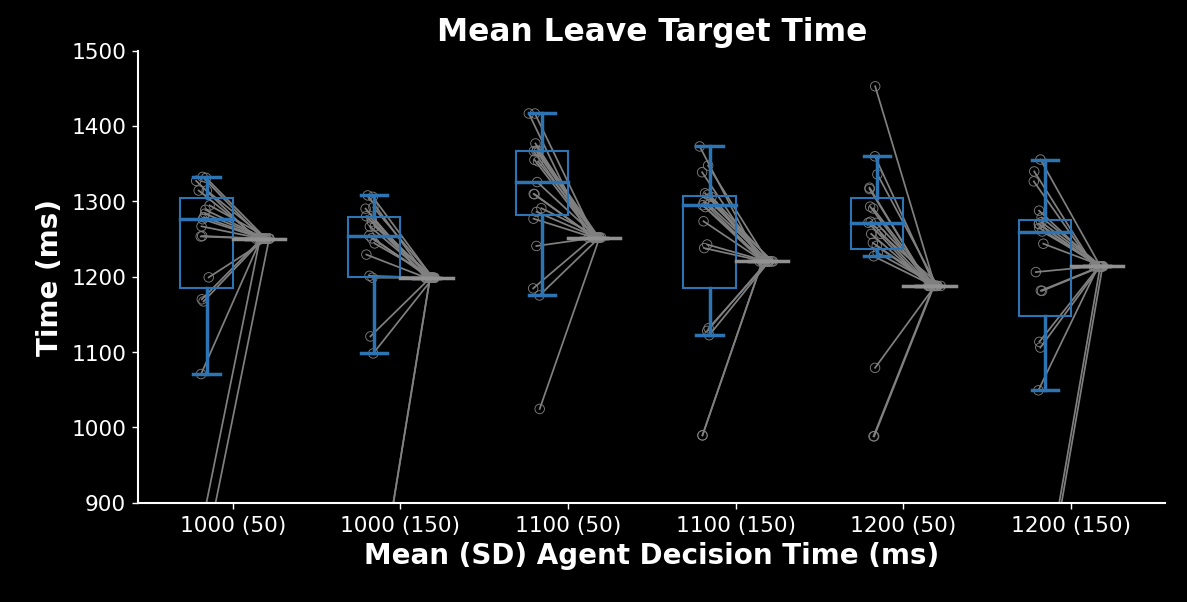

In [9]:
metric = group.combine_all_subjects('player_task_decision_time_mean') 
optimal_metric = grouped.combine_all_subjects('wtd_optimal_leave_target_time')
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs-bw/2,box_width = bw,colors = wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/2,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

multi_boxplot(ax,optimal_metric,xlocs=xlocs+bw/2,box_width = bw,colors = wheel.grey)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/2,data_list=optimal_metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric[:,j],optimal_metric[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Leave Target Time')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()


plt.show()

Player Minus Agent Mean Leave Target Time

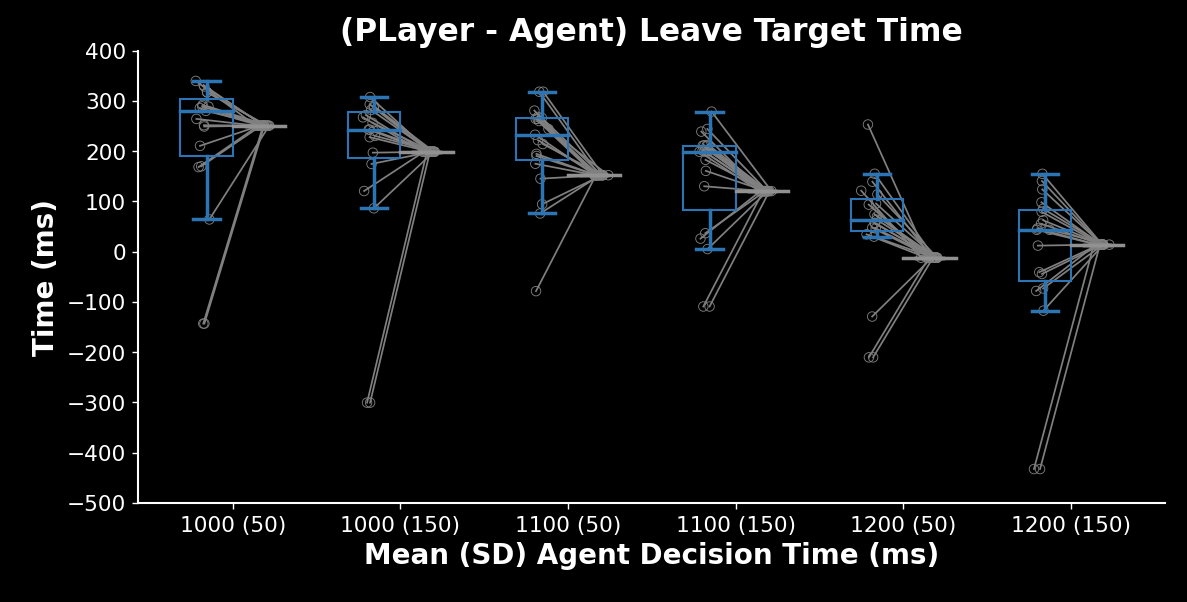

In [10]:
metric = group.combine_all_subjects('player_minus_agent_task_decision_time_mean') 
optimal_metric = grouped.combine_all_subjects('player_minus_agent_leave_time')

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-500,500,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs-bw/2,box_width = bw,colors = wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/2,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

multi_boxplot(ax,optimal_metric,xlocs=xlocs+bw/2,box_width = bw,colors = wheel.grey)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/2,data_list=optimal_metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric[:,j],optimal_metric[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Leave Target Time')
if save:
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
axmain.set_axis_off()


plt.show()

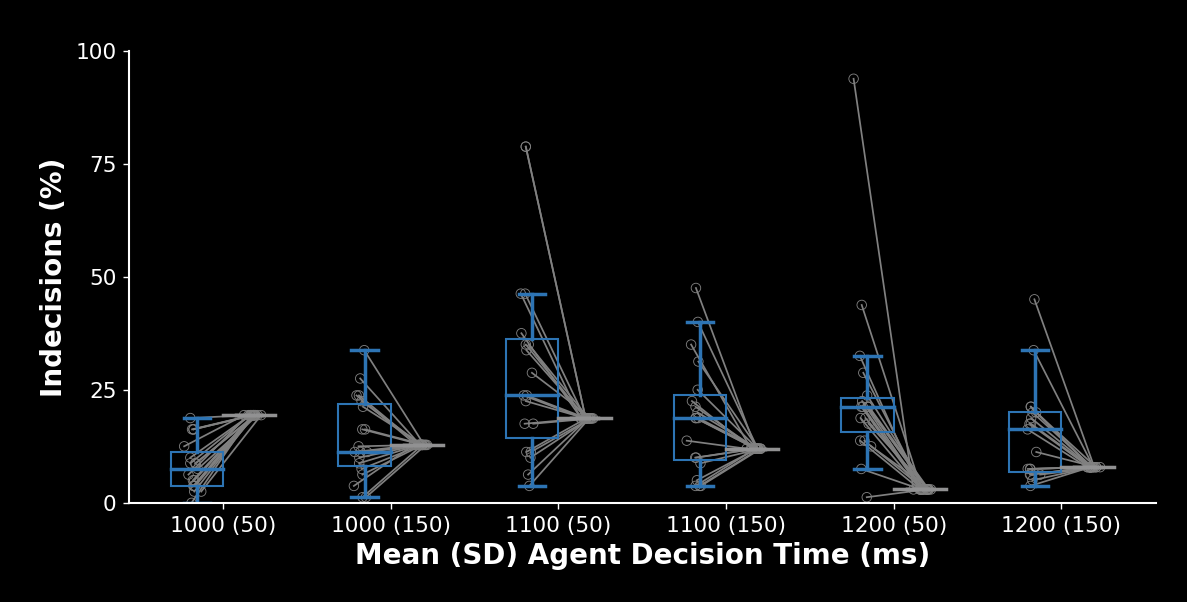

In [11]:
metric = group.combine_all_subjects('player_perc_indecisions') 
optimal_metric = grouped.combine_all_subjects('perc_indecision_calc')

# optimal_metric = group_model.prob_indecision_based_on_reach_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs-bw/2,box_width = bw,colors = wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/2,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

multi_boxplot(ax,optimal_metric,xlocs=xlocs+bw/2,box_width = bw,colors = wheel.grey)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/2,data_list=optimal_metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric[:,j],optimal_metric[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'indecisions', dpi = 400, transparent = True)
axmain.set_axis_off()
plt.show()

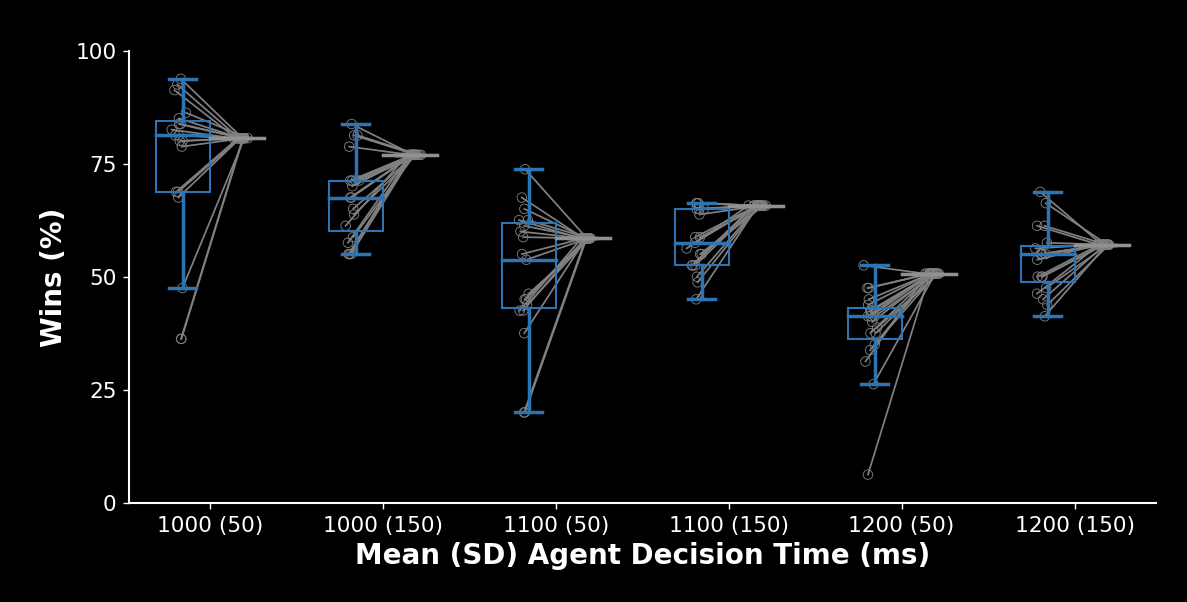

In [12]:
metric = group.combine_all_subjects('player_perc_wins') 
optimal_metric = grouped.combine_all_subjects('perc_win_calc')

# optimal_metric = group_model.prob_indecision_based_on_reach_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs-bw/2,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric,xlocs=xlocs+bw/2,box_width = bw,colors = wheel.grey)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric[:,j],optimal_metric[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

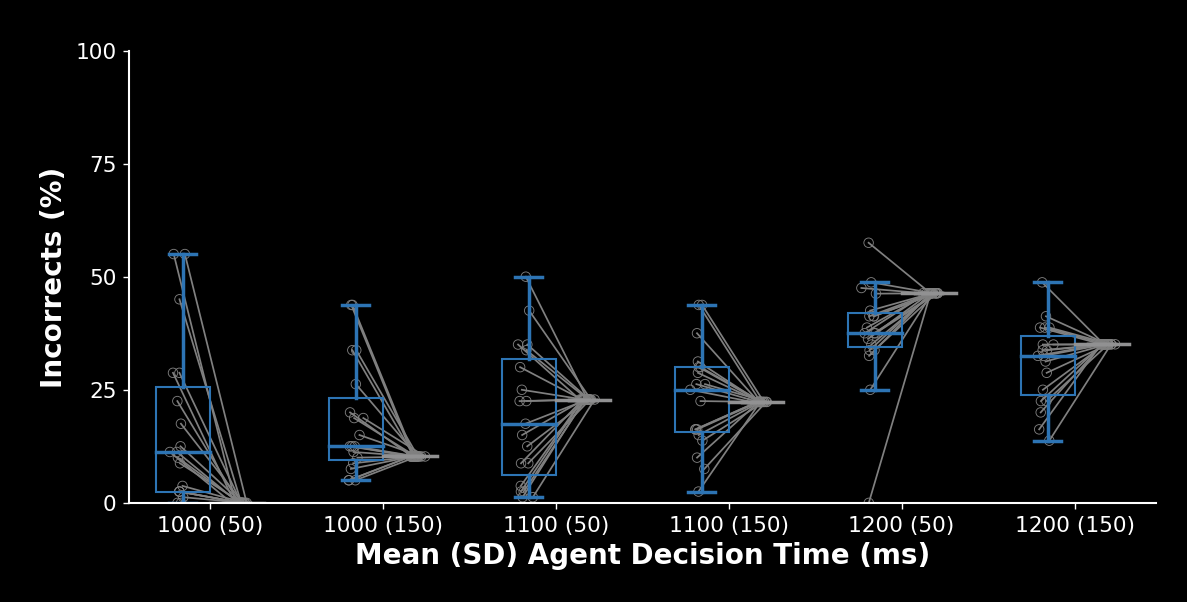

In [13]:
metric = group.combine_all_subjects('player_perc_incorrects') 
optimal_metric = grouped.combine_all_subjects('perc_incorrect_calc')

# optimal_metric = group_model.prob_indecision_based_on_reach_time
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs-bw/2,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric,xlocs=xlocs+bw/2,box_width = bw,colors = wheel.grey)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/2,data_list=optimal_metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric[:,j],optimal_metric[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Reaction and Gamble Decisions

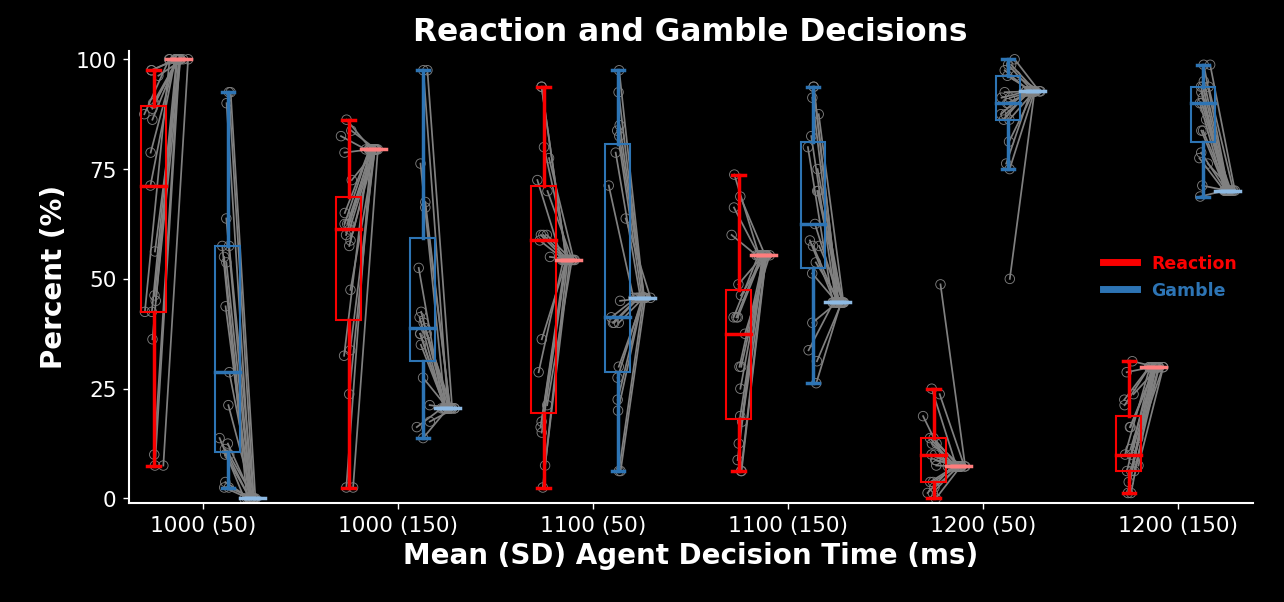

In [14]:

data_metric1 = group.combine_all_subjects('perc_reactions')
data_metric2 = group.combine_all_subjects('perc_gambles')
optimal_metric1 = grouped.combine_all_subjects('prob_selecting_reaction_optimal')*100
optimal_metric2 = grouped.combine_all_subjects('prob_selecting_gamble_optimal')*100
# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 13,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.33
multi_boxplot(ax,data_metric1,xlocs=xlocs-(2*bw),box_width = bw,colors = wheel.seth_red)
multi_boxplot(ax,optimal_metric1,xlocs=xlocs-bw,box_width = bw,colors = wheel.lighten_color(wheel.seth_red,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-2*bw,-bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],optimal_metric1[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
multi_boxplot(ax,data_metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric2,xlocs=xlocs+(2*bw),box_width = bw,colors = wheel.lighten_color(wheel.seth_blue,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([bw,2*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric2[:,j],optimal_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
ax.set_xlim(min(xlocs)-3*bw,max(xlocs)+3*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()
plt.show()

Reaction and Gamble Leave Times

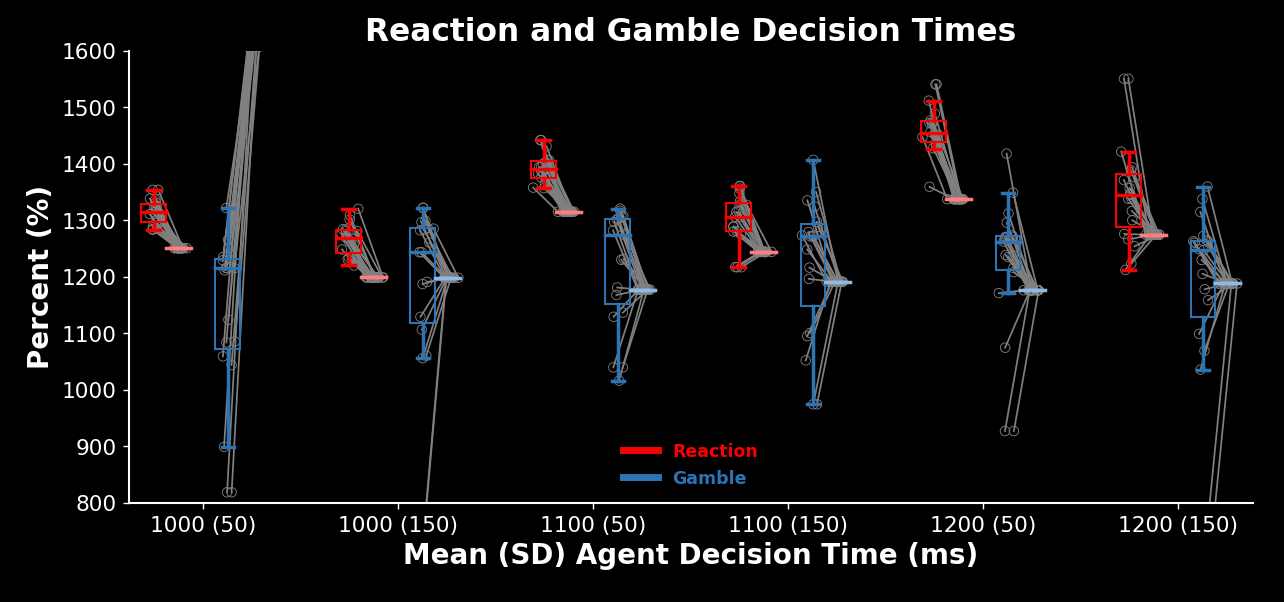

In [15]:

data_metric1 = group.combine_all_subjects('reaction_decision_time_mean')
data_metric2 = group.combine_all_subjects('gamble_decision_time_mean')
optimal_metric1 = grouped.combine_all_subjects('optimal_reaction_leave_target_time')
optimal_metric2 = grouped.combine_all_subjects('optimal_gamble_leave_target_time')
# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 13,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(800,1700,100)


bw = 0.33
multi_boxplot(ax,data_metric1,xlocs=xlocs-(2*bw),box_width = bw,colors = wheel.seth_red)
multi_boxplot(ax,optimal_metric1,xlocs=xlocs-bw,box_width = bw,colors = wheel.lighten_color(wheel.seth_red,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-2*bw,-bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],optimal_metric1[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
multi_boxplot(ax,data_metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric2,xlocs=xlocs+(2*bw),box_width = bw,colors = wheel.lighten_color(wheel.seth_blue,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([bw,2*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric2[:,j],optimal_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
ax.set_xlim(min(xlocs)-3*bw,max(xlocs)+3*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decision Times')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_model', dpi = 400, transparent = True)
axmain.set_axis_off()
plt.show()

Percent Indecisions That Were Gambles

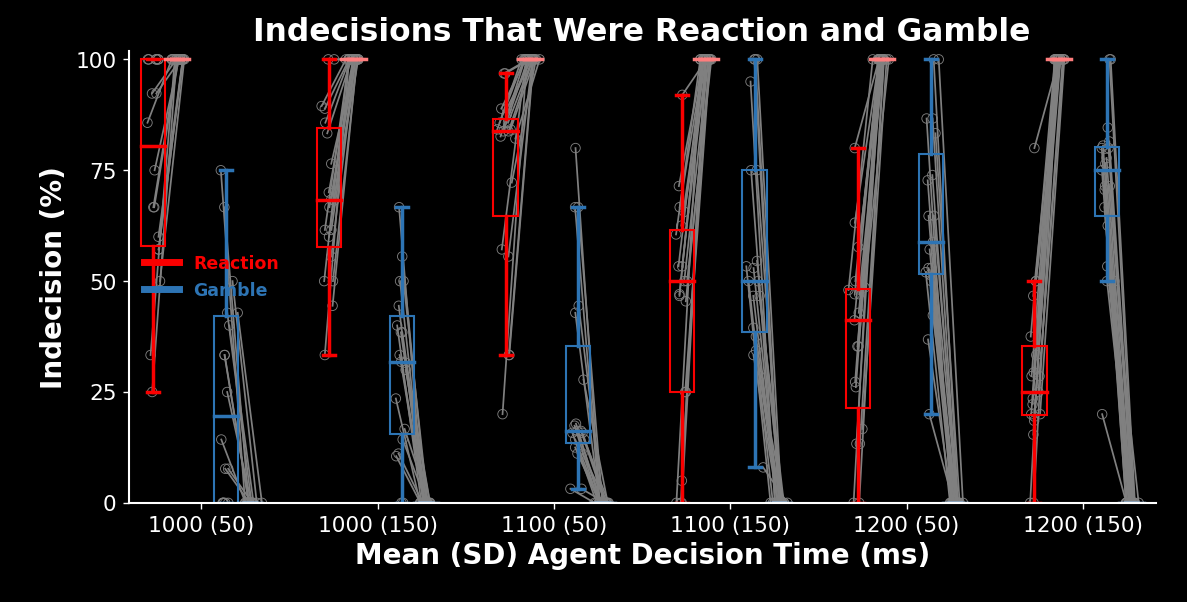

In [16]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
data_metric1 = group.combine_all_subjects('perc_indecisions_that_were_reactions') 
data_metric2 = group.combine_all_subjects('perc_indecisions_that_were_gambles') 
optimal_metric1 = grouped.combine_all_subjects('perc_indecisions_that_were_reaction')
optimal_metric2 = grouped.combine_all_subjects('perc_indecisions_that_were_gamble')
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.33
multi_boxplot(ax,data_metric1,xlocs=xlocs-(2*bw),box_width = bw,colors = wheel.seth_red)
multi_boxplot(ax,optimal_metric1,xlocs=xlocs-bw,box_width = bw,colors = wheel.lighten_color(wheel.seth_red,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-2*bw,-bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],optimal_metric1[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
multi_boxplot(ax,data_metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric2,xlocs=xlocs+(2*bw),box_width = bw,colors = wheel.lighten_color(wheel.seth_blue,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([bw,2*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric2[:,j],optimal_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_xlim(min(xlocs)-3*bw,max(xlocs)+3*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Indecision (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Indecisions That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'reaction_and_gamble_indecisions', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Wins That were reaction and gamble

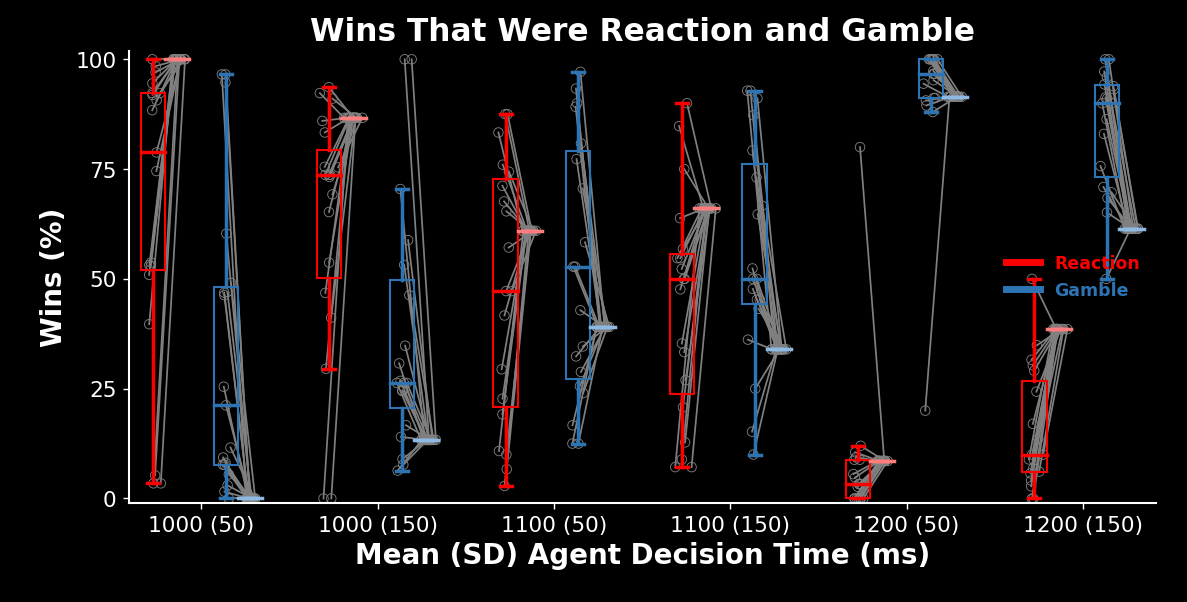

In [17]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
data_metric1 = group.combine_all_subjects('perc_wins_that_were_reactions') 
data_metric2 = group.combine_all_subjects('perc_wins_that_were_gambles') 
optimal_metric1 = grouped.combine_all_subjects('perc_wins_that_were_reaction')
optimal_metric2 = grouped.combine_all_subjects('perc_wins_that_were_gamble')

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)
bw = 0.33
multi_boxplot(ax,data_metric1,xlocs=xlocs-(2*bw),box_width = bw,colors = wheel.seth_red)
multi_boxplot(ax,optimal_metric1,xlocs=xlocs-bw,box_width = bw,colors = wheel.lighten_color(wheel.seth_red,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-2*bw,-bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],optimal_metric1[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
multi_boxplot(ax,data_metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric2,xlocs=xlocs+(2*bw),box_width = bw,colors = wheel.lighten_color(wheel.seth_blue,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([bw,2*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric2[:,j],optimal_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_xlim(min(xlocs)-3*bw,max(xlocs)+3*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Wins That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

Incorrects that were reaction and gamble

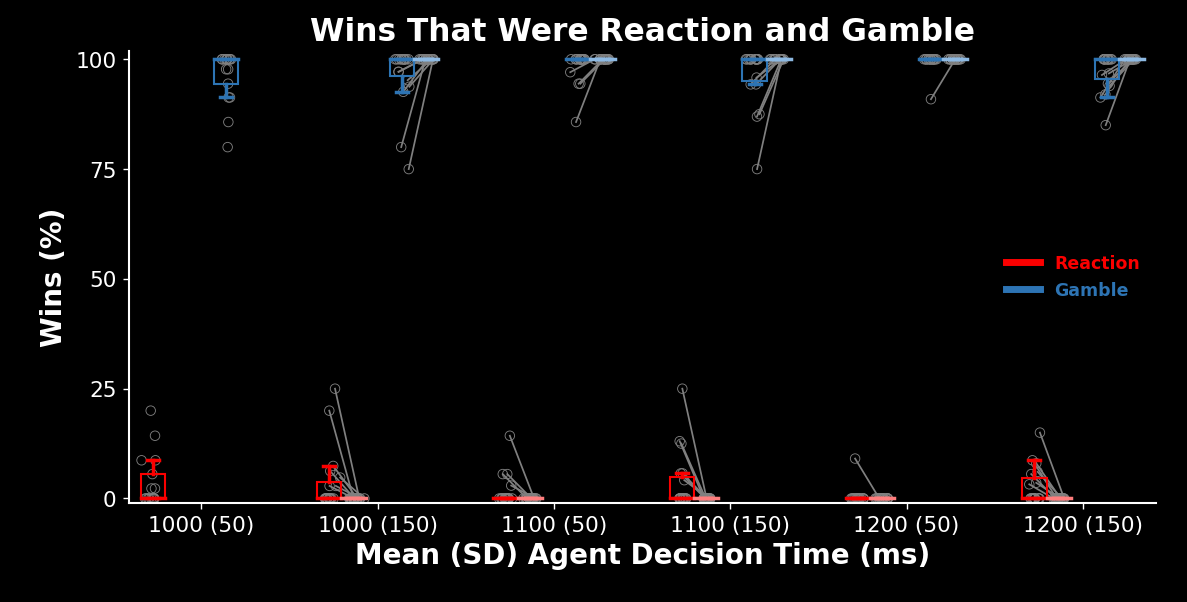

In [18]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
data_metric1 = group.combine_all_subjects('perc_incorrects_that_were_reactions') 
data_metric2 = group.combine_all_subjects('perc_incorrects_that_were_gambles') 
optimal_metric1 = grouped.combine_all_subjects('perc_incorrects_that_were_reaction')
optimal_metric2 = grouped.combine_all_subjects('perc_incorrects_that_were_gamble')

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)
bw = 0.33
multi_boxplot(ax,data_metric1,xlocs=xlocs-(2*bw),box_width = bw,colors = wheel.seth_red)
multi_boxplot(ax,optimal_metric1,xlocs=xlocs-bw,box_width = bw,colors = wheel.lighten_color(wheel.seth_red,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-2*bw,-bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],optimal_metric1[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        
multi_boxplot(ax,data_metric2,xlocs=xlocs+bw,box_width = bw,colors = wheel.seth_blue)
multi_boxplot(ax,optimal_metric2,xlocs=xlocs+(2*bw),box_width = bw,colors = wheel.lighten_color(wheel.seth_blue,0.5))
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([bw,2*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric2[:,j],optimal_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

ax.set_xlim(min(xlocs)-3*bw,max(xlocs)+3*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Wins That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'incorrects_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

OUt of the Reaction/Gamble How many times did they win (not done)

In [19]:
# Out of x number of reaction and gamble decisions, how many of them were indecisions
metric1 = group.combine_all_subjects('perc_reaction_wins') 
metric2 = group.combine_all_subjects('perc_gamble_wins') 
optimal_metric1 = group_model.perc_wins_that_were_reaction
optimal_metric2 = group_model.perc_wins_that_were_gamble
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(-1,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Wins (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Wins of Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    plt.savefig(SAVE_PATH+'wins_that_were_reaction_and_gamble', dpi = 400, transparent = True)
axmain.set_axis_off()

plt.show()

NameError: name 'group_model' is not defined